# Use this program to create my database of handwriten number

## load all packages

In [49]:
# from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
#import PIL

import h5py

import pandas as pd

print("tf ver:\t\t", tf.__version__)
print("keras ver:\t", keras.__version__)
print("np ver:\t\t", np.__version__)
# print("PIL ver:\t", PIL.__version__)
print("pil ver:\t", Image.__version__)
print("pandas ver:\t", pd.__version__)


tf ver:		 2.7.0
keras ver:	 2.7.0
np ver:		 1.17.4
pil ver:	 7.0.0
pandas ver:	 0.25.3


# Can we read images?

## Individual image

In [50]:
imgs = []

In [51]:
three = np.invert(Image.open('pixil-frame-0 (4).png').convert(mode='L', matrix=None, dither=None, palette=1, colors=256))
imgs = np.expand_dims(three, 0)

In [52]:
imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        103, 164,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 199,
        243, 236,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163, 200, 164,
        162, 185,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 162, 185,   0,   0,
        101, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

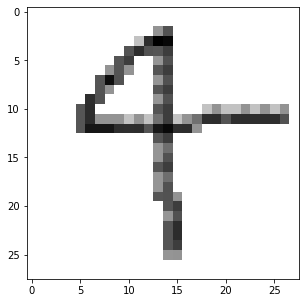

In [53]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.subplot(1,1,1)
# plt.xticks([])
#     plt.yticks([])
plt.grid(False)
plt.imshow(imgs[0], cmap=plt.cm.binary)
#     plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
plt.show()

---

## Read all images and labels from a list in a file

In [54]:
df = pd.read_csv('nums.csv')

In [55]:
imgs = []
labels = []

In [56]:
len(imgs)

0

In [57]:
for file in df['file']:
    print(file)
    in_img = np.invert(Image.open('pixil-frame-0 (' + str(file) + ').png').convert('L').resize((28,28)))
    print(in_img)
    in_img.shape
    if len(imgs) == 0:
        imgs = np.expand_dims(in_img, 0)
    else:
        in_img = np.expand_dims(in_img, 0)
        imgs = np.append(imgs, in_img, axis = 0)

1
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 103 103   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 162 235 201   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 199 222 201   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 162 164 162 185   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 101 165   0   0 

## Set up Single Labels

Do not run anymore

In [58]:
# labels = np.array([3])

In [59]:
print(labels)

[]


In [60]:
type(labels)

list

## Lables from dataframe

In [61]:
labels = df['label'].to_numpy()

## Save data to disk

In [62]:
print(labels)

[1 2 3 4 5 6 7 8 9 1 2 3]


In [63]:
np.savez('mynumber.npz', images=imgs, labels=labels)